### L'inclinazione della curva dei rendimenti negli Stati Uniti
Calcoliamo due misure di inclinazione della curva dei rendimenti 10 anni - 2 anni e 10 anni - 3 mesi
Utilizziamo le serie storiche della Federal Reserve Bank di Saint Louis - Il sito è https://fred.stlouisfed.org

Le serie che scarichiamo sono

Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity (DGS10) - giornaliera https://fred.stlouisfed.org/series/DGS10

Market Yield on U.S. Treasury Securities at 2-Year Constant Maturity (DGS2) - giornaliera https://fred.stlouisfed.org/series/DGS2

3-Month Treasury Bill Secondary Market Rate (DTB3) - giornaliera
https://fred.stlouisfed.org/series/DTB3

__PER CAPIRE:__ <br>
I titoli del tesoro degli stati uniti (US Treasury Securities) sono obbligazioni a lungo termine, mentre le Treasury Bill sono obbligazioni a breve termine (pochi giorni fino ad un anno). <br>
Quello che vuole fare lui è fare la differenza tra i rendimenti dei titoli del tesoro US a 10 anni e 2 anni, rappresentare le differenze tra tali rendimenti con un grafico e analizzare l'andamento della curva: se la curva è in positivo potrebbe indicare aspettative di crescita economica futura, mentre se la curva è in negativo potrebbe indicare aspettative di rallentamento economico. <br>
Fa la stessa cosa con la differenza tra i rendimenti dei titoli del tesoro US a 10 anni e le treasury bill a 3 mesi:  una curva inclinata positivamente potrebbe indicare aspettative di crescita economica, mentre una curva inclinata negativamente potrebbe indicare preoccupazioni per un possibile rallentamento economico o una recessione.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
T10 = pd.read_excel('DGS10.xlsx', index_col = 0, parse_dates = True)

In [3]:
T02 = pd.read_excel('DGS2.xlsx', index_col = 0, parse_dates = True)

In [4]:
TB3 = pd.read_excel('DTB3.xlsx', index_col = 0, parse_dates = True)

In [5]:
TSoIR = pd.concat([T10, T02, TB3], axis = 1)
TSoIR.head() # le informazioni sono già in percentuale (4.25 sta per 4.25%)

,DGS10,DGS2,DTB3
DATA,,,
2004-04-12,4.25,1.91,0.93
2004-04-13,4.35,2.01,0.93
2004-04-14,4.40,2.13,0.94
2004-04-15,4.42,2.10,0.93
2004-04-16,4.37,2.03,0.92


In [6]:
TSoIR.shape

(5219, 3)

In [7]:
TSoIR.isnull().sum() # conta il numero di valori mancanti / nulli

DGS10    213
DGS2     213
DTB3     213
dtype: int64

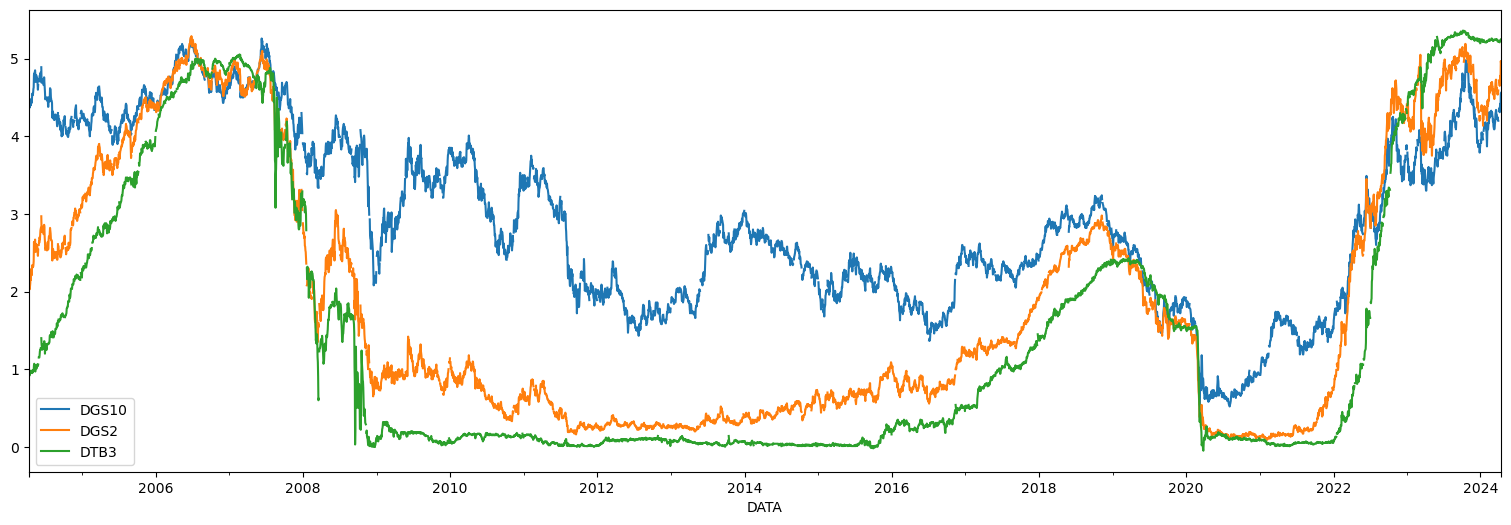

In [8]:
plt.figure(figsize = (19,6))
TSoIR['DGS10'].plot()
TSoIR['DGS2'].plot()
TSoIR['DTB3'].plot()
plt.legend();


Calcoliamo la differenza fra rendimenti a 10 anni e rendimenti a breve termine (2 anni o 3 mesi)

In [9]:
TSoIR['TP_10_2'] = TSoIR['DGS10'] - TSoIR['DGS2']
TSoIR['TP_10_3m'] = TSoIR['DGS10'] - TSoIR['DTB3']
TSoIR.head()

,DGS10,DGS2,DTB3,TP_10_2,TP_10_3m
DATA,,,,,
2004-04-12,4.25,1.91,0.93,2.34,3.32
2004-04-13,4.35,2.01,0.93,2.34,3.42
2004-04-14,4.40,2.13,0.94,2.27,3.46
2004-04-15,4.42,2.10,0.93,2.32,3.49
2004-04-16,4.37,2.03,0.92,2.34,3.45


In [11]:
TSoIR['TP_10_2'].mean()

1.0632141430283657

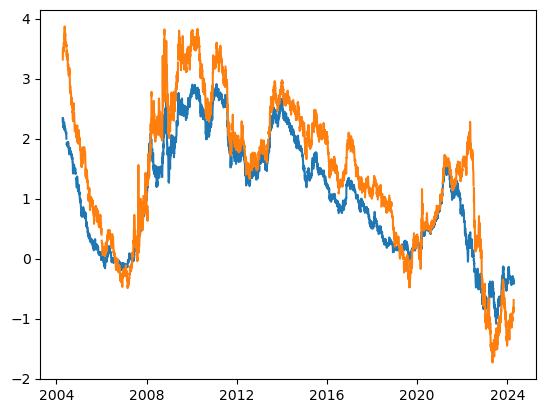

In [12]:
plt.plot(TSoIR['TP_10_2'])
plt.plot(TSoIR['TP_10_3m']);


In [13]:
TSoIR.isnull().sum() # conta il numero di valori mancanti / nulli

DGS10       213
DGS2        213
DTB3        213
TP_10_2     213
TP_10_3m    213
dtype: int64

In [14]:
TSoIR.shape

(5219, 5)

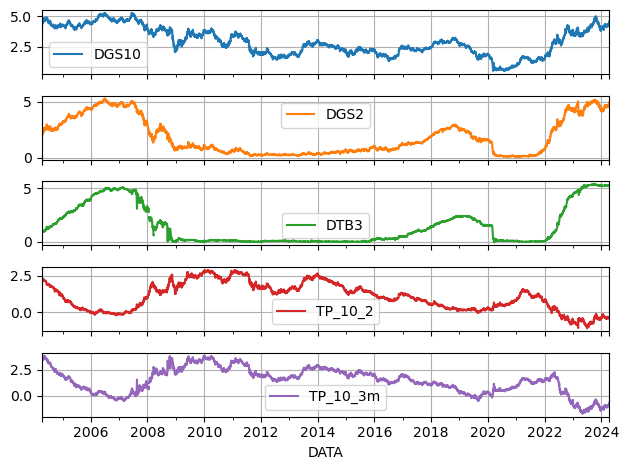

In [15]:
TSoIR.plot(subplots=True, grid=True)
plt.tight_layout();

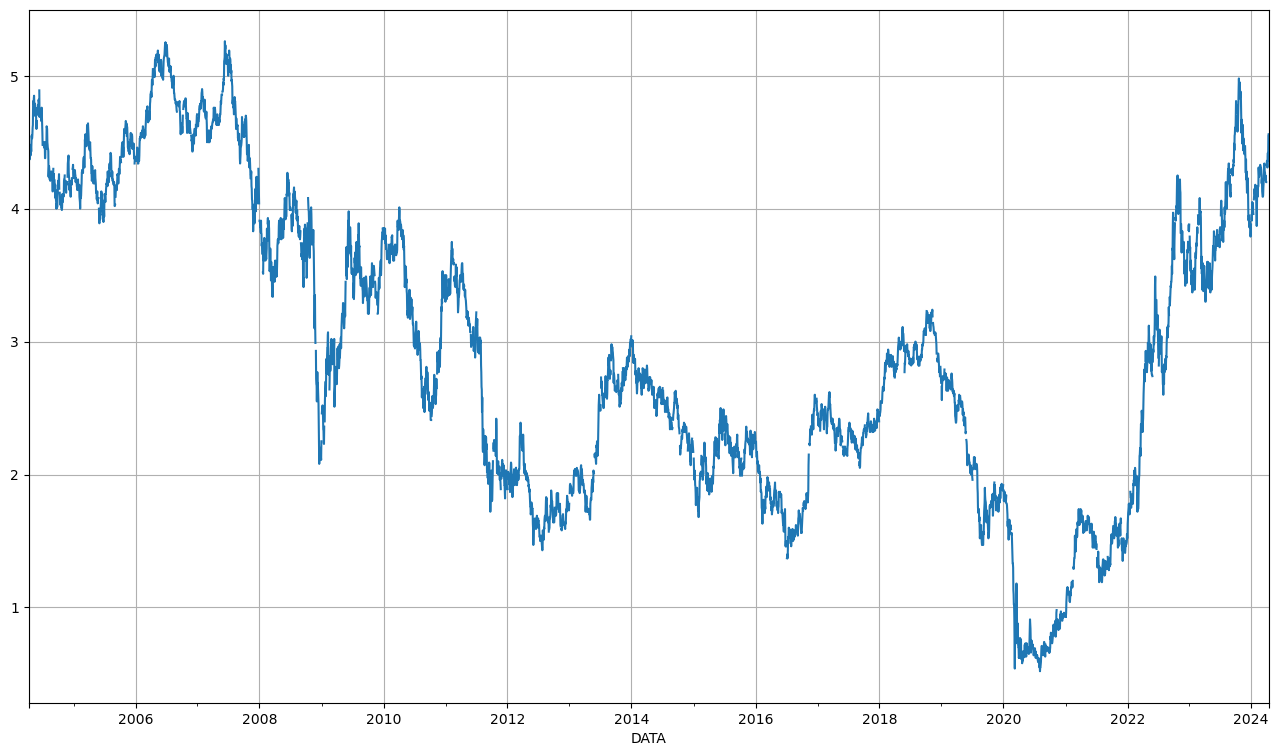

In [41]:
TSoIR['DGS10'].plot(grid=True, figsize=(16,9));

In [42]:
TSoIR_nna = TSoIR.dropna()
TSoIR_nna.shape

(5006, 5)

In [43]:
TSoIR_nna.head()

,DGS10,DGS2,DTB3,TP_10_2,TP_10_3m
DATA,,,,,
2004-04-12,4.25,1.91,0.93,2.34,3.32
2004-04-13,4.35,2.01,0.93,2.34,3.42
2004-04-14,4.40,2.13,0.94,2.27,3.46
2004-04-15,4.42,2.10,0.93,2.32,3.49
2004-04-16,4.37,2.03,0.92,2.34,3.45


In [44]:
TSoIR_nna.isnull().sum()

DGS10       0
DGS2        0
DTB3        0
TP_10_2     0
TP_10_3m    0
dtype: int64

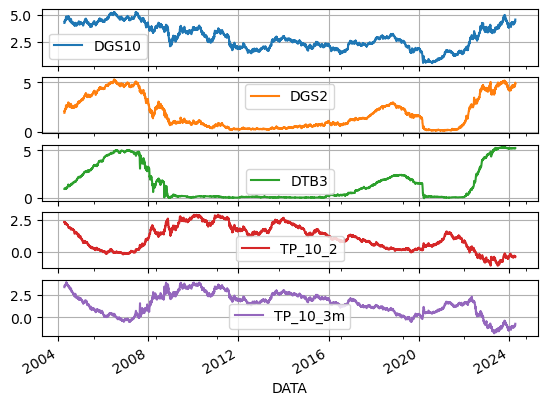

In [45]:
TSoIR_nna.plot(subplots=True, grid=True);

In [46]:
TSoIR_nna.describe()

,DGS10,DGS2,DTB3,TP_10_2,TP_10_3m
count,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000
mean,2.913042,1.849828,1.474638,1.063214,1.438404
std,1.129486,1.611222,1.764825,0.952212,1.220399
min,0.520000,0.090000,-0.050000,-1.080000,-1.730000
25%,2.010000,0.480000,0.080000,0.240000,0.550000
50%,2.760000,1.190000,0.380000,1.060000,1.550000
75%,3.870000,2.897500,2.380000,1.780000,2.310000
max,5.260000,5.290000,5.360000,2.910000,3.870000


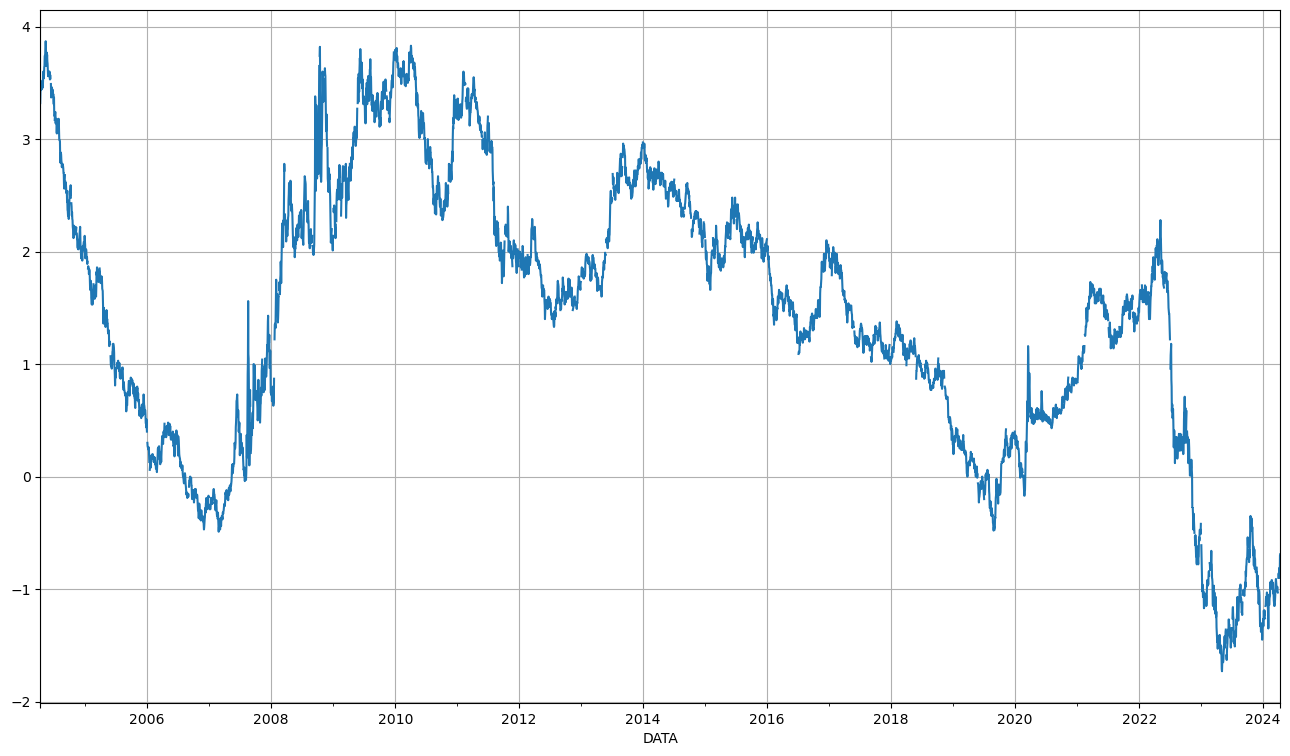

In [47]:
TSoIR['TP_10_3m'].plot(grid=True, figsize=(16,9));

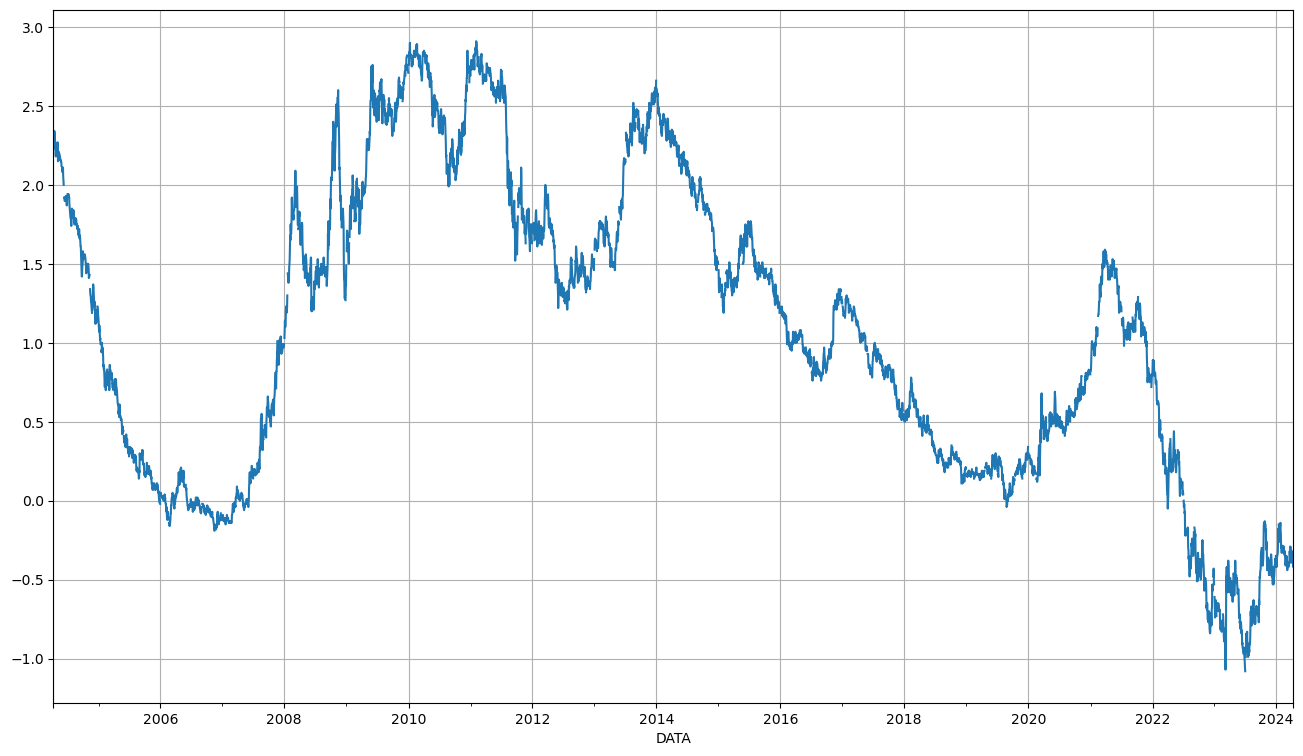

In [48]:
TSoIR['TP_10_2'].plot(grid=True, figsize=(16,9));